# Visualization of reliability results

In this example, we demonstrate how to visualize the results of a reliability method. The `form` method is used to estimate the probability of levee failure due to the piping mechanism. This failure mechanism is characterized using the model of Bligh.

### Define model

First, let's we import the necessary classes:

In [25]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod

And the following limit state function:

In [26]:
from utils.models import bligh

To perform a reliability analysis, we create a reliability project and define the limit state function (model):

In [27]:
project = ReliabilityProject()
project.model = bligh

project.model.print()

Model bligh:
Input parameters:
  m
  L
  c_creep
  delta_H
Output parameters:
  Z


We assume the following distributions for the parameters $m$, $L$, $c_{creep}$ and $\Delta H$:

In [28]:
project.variables["m"].distribution = DistributionType.log_normal
project.variables["m"].mean = 1.76
project.variables['m'].deviation = 0.1

project.variables["L"].distribution = DistributionType.normal
project.variables["L"].mean = 50
project.variables["L"].deviation = 2.5

project.variables["c_creep"].distribution = DistributionType.deterministic
project.variables["c_creep"].mean = 18

project.variables["delta_H"].distribution = DistributionType.gumbel
project.variables["delta_H"].shift = 0.53
project.variables["delta_H"].scale = 0.406

### Perform reliability calculations with FORM

The reliability analysis is executed using `project.run()`, and the results can be accessed via `project.design_point`. To gain insight into the results, we save the realizations and convergence information.

In [29]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.75
project.settings.maximum_iterations = 50
project.settings.epsilon_beta = 0.01

project.settings.save_realizations = True
project.settings.save_convergence = True

project.run()

project.design_point.print()

Reliability (FORM)
 Reliability index = 3.997
 Probability of failure = 3.214e-05
 Convergence = 0.009351 (converged)
 Model runs = 20
Alpha values:
 m: alpha = 0.1494, x = 1.699
 L: alpha = 0.1347, x = 48.65
 c_creep: alpha = 0, x = 18
 delta_H: alpha = -0.9796, x = 4.591



### Visualize random variables

Using the `plot()` method, we can plot the pdf and cdf of a random variable:

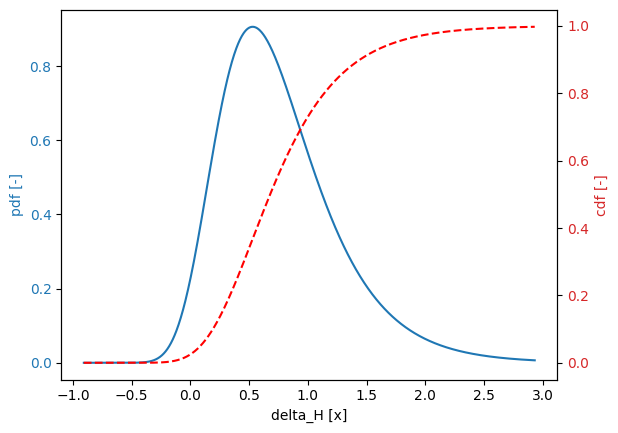

In [30]:
project.variables["delta_H"].plot()

### Visualize reliability index and failure probability

Using the `plot_convergence()` method, we can plot the reliability index ($\beta$) and failure probability, corresponding to different model runs:

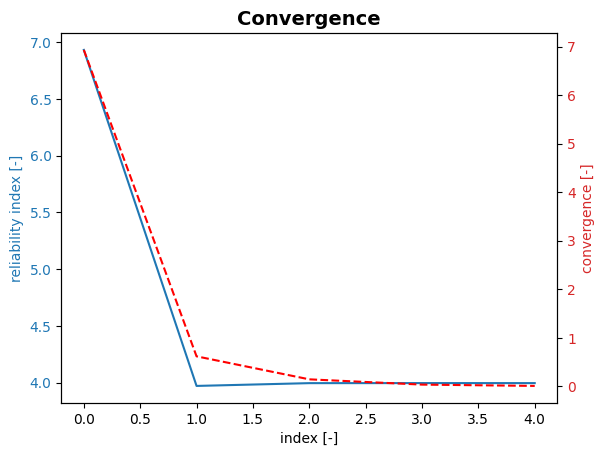

In [31]:
project.design_point.plot_convergence()

### Visualize contribution of random variables

Using the `plot_alphas()` method, we can visualize the contributions of random variables ($\alpha^2$) in a pie chart:

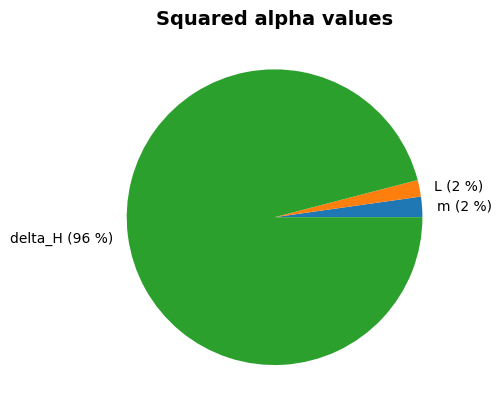

In [32]:
project.design_point.plot_alphas()

### Visualize realizations and design point

Using the `plot_realizations()` method, we can visualize the realizations and the design point in a two-dimensional space. This is done for the two most contributing variables.

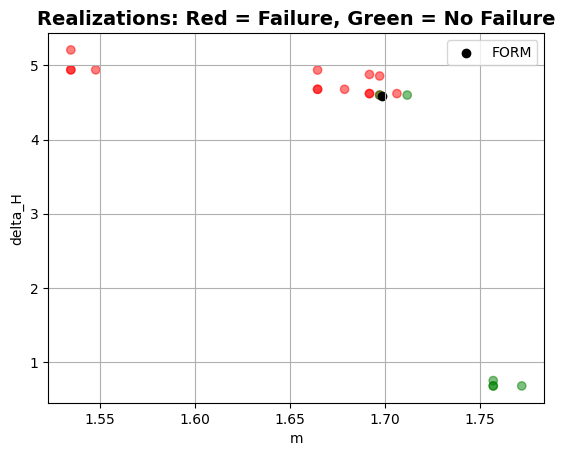

In [33]:
project.design_point.plot_realizations()

### Modify plots

It is possible to modify the plots using the `get_plot()` method, as demonstrated below:

Text(0.5, 1.0, 'New title')

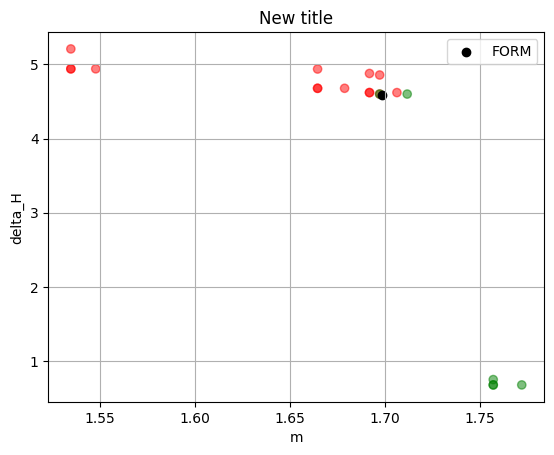

In [34]:
plt = project.design_point.get_plot_realizations()
plt.title("New title")

Text(0.5, 1.0, 'My distribution')

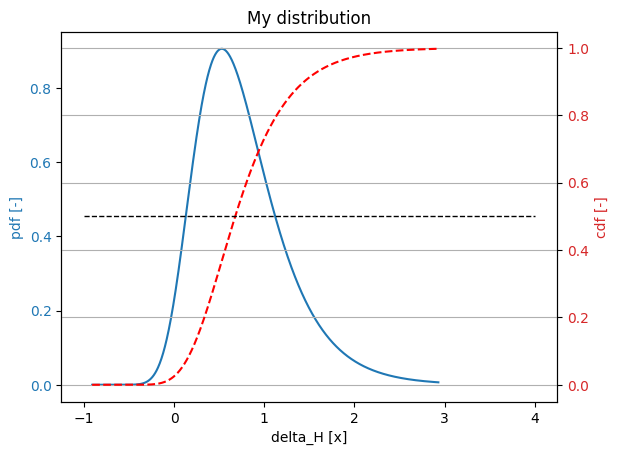

In [35]:
plt = project.variables["delta_H"].get_plot()
plt.grid()
plt.plot([-1.0, 4.0], [0.5, 0.5], 'k--', lw=1)
plt.title("My distribution")

We can save the figure to a file using `savefig()`:

In [36]:
# plt.savefig("my_distribution.png")

<Figure size 640x480 with 0 Axes>